<a href="https://colab.research.google.com/github/2310030224-PranayVarma/2310030224-PranayVarma/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform Iris flower classification by loading the dataset, visually exploring its features and their relationships with species using scatter plots and histograms, splitting the data into training and testing sets, training a classification model, and evaluating its performance with metrics like accuracy and a confusion matrix. Finally, summarize the model's performance and key insights from the data exploration.

## Load Dataset

### Subtask:
Load the Iris dataset, which is a classic dataset for classification tasks, typically available through scikit-learn.


**Reasoning**:
To load the Iris dataset, convert it into a pandas DataFrame, and add the target species column, I will import necessary libraries, load the dataset, create the DataFrame with feature names, and then append the species information.



In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a pandas DataFrame from the data and feature names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the 'species' column using the target attribute
df['species'] = iris.target

# Display the first few rows of the DataFrame to verify
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Explore Dataset

### Subtask:
Perform visual exploration of the dataset using scatter plots and histograms to understand the distribution of features and relationships between them and the target species. Ensure legends are provided for clarity.


**Reasoning**:
To visually explore the dataset, I will import `matplotlib.pyplot` and `seaborn` and then generate a pair plot using `seaborn` to visualize relationships between all pairs of features and their distributions, colored by species, as specified in the instructions.



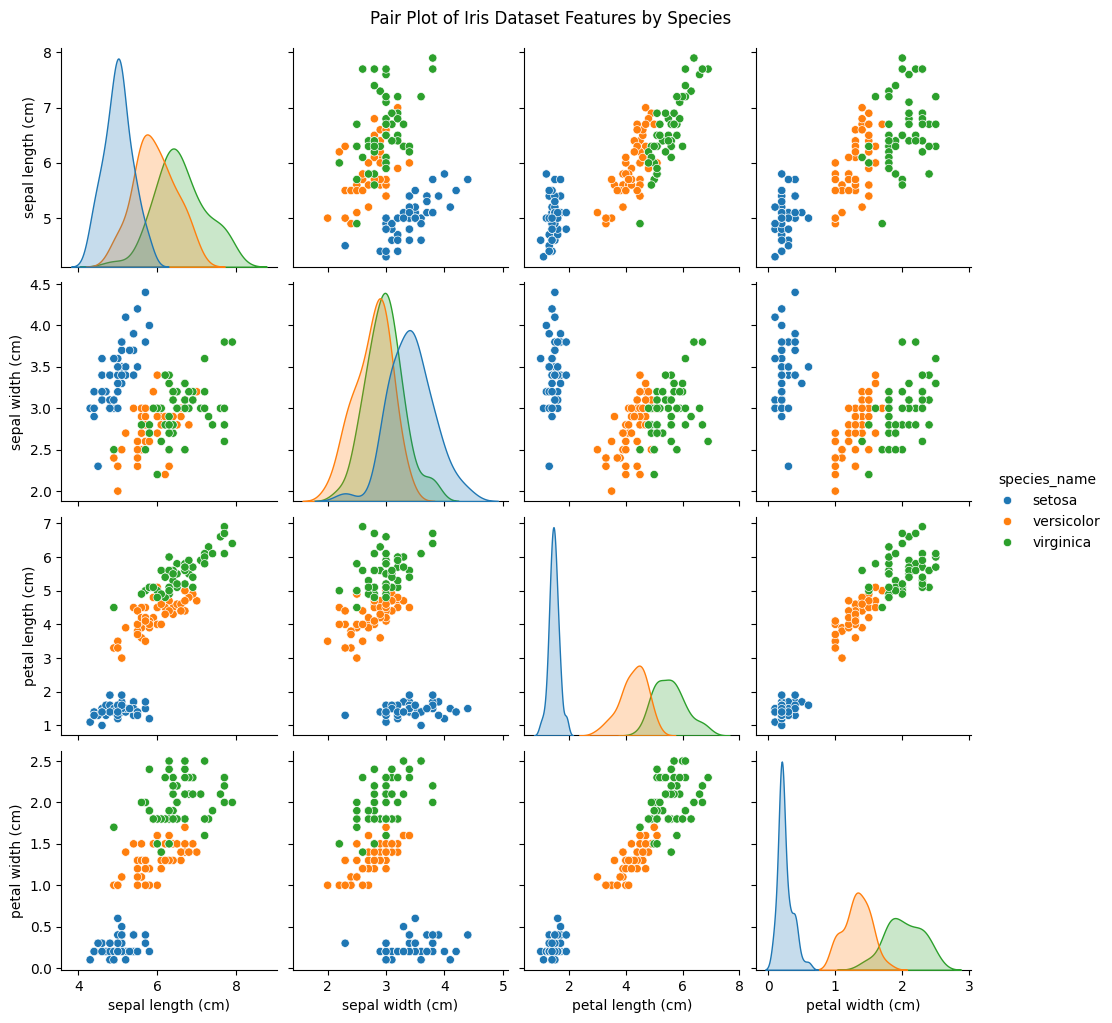

Generated pair plot showing feature distributions and relationships by species.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numerical species to their names for better readability in plots
iris_species_names = load_iris().target_names
df['species_name'] = df['species'].apply(lambda x: iris_species_names[x])

# Generate a pair plot
sns.pairplot(df.drop(columns=['species']), hue='species_name', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Dataset Features by Species', y=1.02) # Add a title above the plots
plt.show()
print("Generated pair plot showing feature distributions and relationships by species.")

## Split Data

### Subtask:
Split the dataset into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
To prepare the data for model training, I will separate the features (X) from the target (y), ensuring 'species' and 'species_name' are excluded from the features. Then, I will use `train_test_split` from `sklearn.model_selection` to divide the dataset into training and testing sets with a test size of 0.2 and a random state of 42 for reproducibility.



In [3]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['species', 'species_name'])
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Train Classifier

### Subtask:
Train a simple classification model (e.g., Logistic Regression, K-Nearest Neighbors, or Decision Tree) on the training data.


**Reasoning**:
To train a Logistic Regression model as instructed, I will import the necessary class, instantiate it with the specified random state, and then fit the model to the training data.



In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model

### Subtask:
Evaluate the trained model's performance on the test set using metrics such as accuracy, precision, and a confusion matrix.


**Reasoning**:
To evaluate the trained model, I will first make predictions on the test set, then import the necessary evaluation metrics from scikit-learn. After that, I will calculate and print the accuracy score and the classification report, and finally, generate and visualize a confusion matrix to comprehensively assess the model's performance.



Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



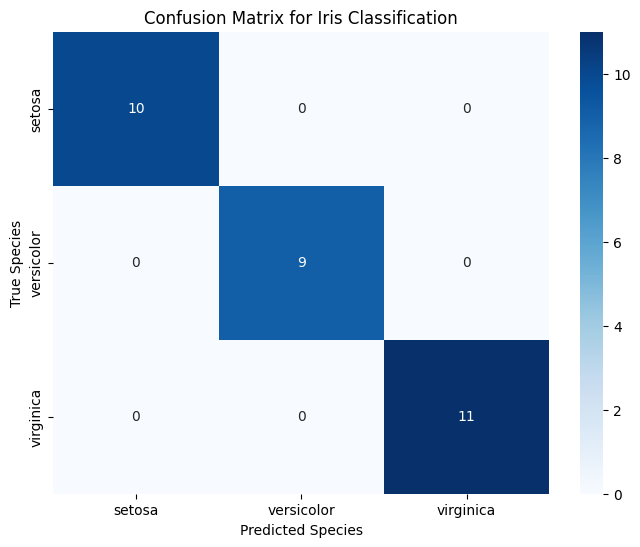

Model evaluation complete with accuracy, classification report, and confusion matrix visualization.


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate and print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris_species_names))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris_species_names, yticklabels=iris_species_names)
plt.title('Confusion Matrix for Iris Classification')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.show()

print("Model evaluation complete with accuracy, classification report, and confusion matrix visualization.")

## Final Task

### Subtask:
Summarize the findings from the Iris flower classification, including the performance of the chosen model and key insights from the data exploration.


## Summary:

### Q&A
The Logistic Regression model achieved a perfect accuracy of 1.0000 on the test set, with precision, recall, and F1-score of 1.00 for all three Iris species. Key insights from data exploration using the pair plot revealed distinct separations between Iris species based on their feature distributions, particularly `petal length (cm)` and `petal width (cm)`. Setosa was clearly separable, while versicolor and virginica showed some overlap but were largely distinguishable.

### Data Analysis Key Findings
*   The Iris dataset, containing 150 samples and 4 features (`sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, `petal width (cm)`) across three species (setosa, versicolor, virginica), was successfully loaded and structured into a pandas DataFrame.
*   Visual exploration using a pair plot demonstrated clear distinctions between the Iris species based on their feature combinations. Specifically, Iris setosa was well-separated from the other two species across all features, while Iris versicolor and Iris virginica showed some overlap, primarily in sepal measurements, but were largely distinguishable using petal measurements.
*   The dataset was split into training (120 samples, 80%) and testing (30 samples, 20%) sets.
*   A Logistic Regression model was trained on the prepared training data.
*   The trained Logistic Regression model achieved exceptional performance on the test set, with a perfect accuracy of 1.0000.
*   The classification report confirmed perfect precision, recall, and F1-score (1.00) for all three species (setosa, versicolor, virginica).
*   The confusion matrix indicated zero misclassifications, with all 30 test samples correctly predicted across the respective species.

### Insights or Next Steps
*   The excellent performance of a simple Logistic Regression model suggests that the Iris dataset is highly separable, especially given the clear visual distinctions observed during data exploration.
*   For future work, one could explore the robustness of this model with cross-validation or investigate feature importance to understand which features contribute most to the classification.
